In [1]:
import re

In [2]:
pip install PyMuPDF

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


In [4]:
import fitz
import re
import os

In [5]:
def extract_text_from_pdf(pdf_path):
    document = fitz.open(pdf_path)
    text = ''
    for page_num in range(document.page_count):
        page = document.load_page(page_num)
        text += page.get_text()
    return text

In [6]:
def extract_name(resume_text):
    lines = resume_text.split('\n')
    return lines[0].strip()

In [7]:
def extract_contact_info(resume_text):
    phone_pattern = re.compile(r'\(?\b[0-9]{3}[-.) ]?[0-9]{3}[-. ]?[0-9]{4}\b')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')

    phone = phone_pattern.findall(resume_text)
    email = email_pattern.findall(resume_text)

    return {'phone': phone[0] if phone else None, 'email': email[0] if email else None}


In [8]:
def extract_education(resume_text):
    education_section = re.search(r'Education(.*?)(?=Experience|Skills|$)', resume_text, re.DOTALL)
    if education_section:
        return education_section.group(1).strip()
    return None

In [9]:
def extract_experience(resume_text):
    experience_section = re.search(r'Experience(.*?)(?=Education|Skills|$)', resume_text, re.DOTALL)
    if experience_section:
        return experience_section.group(1).strip()
    return None

In [10]:
def extract_skills(resume_text):
    skills_section = re.search(r'Skills(.*?)(?=Experience|Education|$)', resume_text, re.DOTALL)
    if skills_section:
        return skills_section.group(1).strip()
    return None

In [11]:
def extract_resume_details(resume_text):
    resume_details = {}
    resume_details['name'] = extract_name(resume_text)
    resume_details['contact_info'] = extract_contact_info(resume_text)
    resume_details['education'] = extract_education(resume_text)
    resume_details['experience'] = extract_experience(resume_text)
    resume_details['skills'] = extract_skills(resume_text)
    return resume_details

In [12]:
pdf_folder_path = '/Users/juyinshafaqinamdar/Desktop/resumes'
resume_details_list = extract_resume_details(pdf_folder_path)
for resume in resume_details_list:
    print(resume)

name
contact_info
education
experience
skills


In [13]:
def process_multiple_pdfs(pdf_folder_path):
    resume_details_list = []
    for file_name in os.listdir(pdf_folder_path):
        if file_name.endswith('.pdf'):
            pdf_path = os.path.join(pdf_folder_path, file_name)
            resume_text = extract_text_from_pdf(pdf_path)
            resume_details = extract_resume_details(resume_text)
            resume_details['file_name'] = file_name
            resume_details_list.append(resume_details)
    return resume_details_list

In [14]:
pdf_folder_path = '/Users/juyinshafaqinamdar/Desktop/resumes'
resume_details_list = process_multiple_pdfs(pdf_folder_path)
for resume in resume_details_list:
    print(resume)

{'name': 'SANA JALGAONKAR', 'contact_info': {'phone': '0831717318', 'email': 'sanajalgaonkar@icloud.com'}, 'education': 'MSc Data Analytics | National College of Ireland    \n  \n  \n  \n  \n  \n                   2024-2025  \nModules: Data Mining and Machine Learning, Database and Analytics Programming, Modelling, Simulation and Optimization, \nStatistics for Data Analytics, Business Intelligence and Business Analytics, Domain Applications for Predictive Analytics, Research \nin Computing, Data Governance in Ethics, Research Methods, Internship.  \n  \nBSc Computer Science | Savitribai Phule Pune University    \n  \n  \n                                                   2015-2018  \nModules: System programming, Theoretical Computer Science, Computer Networks, Internet Programming using PHP, Statistical \nMethods, Programming in Java, Data structure using C and C++, Relational Database Management System, Object Oriented \nconcepts using C++, Object Oriented Software Engineering, Applie

In [15]:
def clean_text(text):
    # Remove multiple spaces
    text = ' '.join(text.split())
    # Remove newline characters
    text = resume.replace('\n', ' ')
    return text


In [16]:
import re

def clean_text_with_regex(resume):
    # Replace multiple spaces/newlines with a single space
    text = re.sub(r'\s+', ' ', text)
    print(text)
    return text


In [17]:
import re

def clean_text(text):
    # Combine multiple spaces into one
    text = ' '.join(text.split())
    # Replace newline characters with a space
    text = text.replace('\n', ' ')
    # Further clean using regex
    text = re.sub(r'\s+', ' ', text)
    return text


In [18]:
pdf_path = '/Users/juyinshafaqinamdar/Desktop/resumes/Aasim Dublin resume 11-04-24.pdf'
resume_text = extract_text_from_pdf(pdf_path)
skills = extract_skills(resume_text)
print(skills)

: SQL, Python, Java, JavaScript, C, C++, Microsoft Office Suite, CSS, HTML, PHP 
 
EDUCATION 
MSc. Data Analytics   
 
 
 
 
 
 
 
 
 
01.2024-01.2025 
National College of Ireland, Dublin, Ireland             
 
 
 
        
 
       
 
Modules: Data Mining and Machine Learning, Database and Analytics Programming, Modelling, Simulation and Optimization, 
Statistics for Data Analytics, Business Intelligence and Business Analytics, Domain Applications for Predictive Analytics, Research in 
Computing, Data Governance in Ethics, Research Methods, Internship.   
 
Bachelor of Engineering, Sapthagiri College of Engineering (NAAC-‘A Grade’), Bangalore, India            
Visvesvaraya Technological University  
 
 
 
 
        
 
       
08.2017-08.2021 
Major in Computer Science with 7.67 CGPA 
Modules: Big Data Analytics, Advanced Computer Architecture, Machine learning, Python, C++, Java, C, Unix System Programming, 
Operating Systems, Cryptography Network Security and Cyber Law, Artificial 

In [19]:
import re
import fitz  # PyMuPDF
import os

def extract_text_from_pdf(pdf_path):
    try:
        document = fitz.open(pdf_path)
        text = ''
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"An error occurred while processing {pdf_path}: {e}")
        return None

def extract_skills(resume_text):
    skills_section = re.search(r'Skills(.*?)(?=Experience|Education|$)', resume_text, re.DOTALL)
    if skills_section:
        return skills_section.group(1).strip()
    return None

def process_multiple_pdfs(pdf_folder_path):
    resume_details_list = []
    for file_name in os.listdir(pdf_folder_path):
        if file_name.endswith('.pdf'):
            pdf_path = os.path.join(pdf_folder_path, file_name)
            resume_text = extract_text_from_pdf(pdf_path)
            if resume_text:
                resume_details = {}
                resume_details['file_name'] = file_name
                resume_details['resume_text'] = resume_text  # Store resume text under 'resume_text' key
                resume_details_list.append(resume_details)
            else:
                print(f"Failed to extract text from {file_name}.")
    return resume_details_list

# Example usage
pdf_folder_path = '/Users/juyinshafaqinamdar/Desktop/resumes'
resume_details_list_skill = process_multiple_pdfs(pdf_folder_path)

for resume_details in resume_details_list_skill:
    resume_text = resume_details.get('resume_text')  # Use .get() method to safely get 'resume_text'
    if resume_text:
        skills = extract_skills(resume_text)
        if skills:
            print(f"Skills extracted from {resume_details['file_name']}:")
            print(skills)
        else:
            print(f"No skills section found in {resume_details['file_name']}.")
    else:
        print(f"Resume text not found for {resume_details['file_name']}.")


Skills extracted from Sana Jalgaonkar_MSc Data 1.pdf:
• Soft Skills: Problem-Solving, Critical Thinking, Quality Assurance, Adaptability, Continuous Learning, Attention to Detail, 
Leadership and Mentorship, Stakeholder Management, Effective Collaboration and Communication. 
• Programming Skills: Python, Shell Scripting, SQL, VBA, Basic to Intermediate Java.  
• Data Visualization using Tableau, Power BI and Microsoft Excel.  
• Data Warehousing, ETL Processes, Data Pipeline and Workflow Management. 
• Databases: MySQL, PostgreSQL, Oracle Database, MongoDB.  
• Cloud Services: AWS and Azure.  
• Others: Exploratory Data Analysis, Feature Engineering, Machine Learning Supervised and Unsupervised algorithms, Natural 
Language Processing, version control using Git, Automation using Selenium with python, APIs, Oracle Data Integrator, 
Statistics.  
• Tech Courses:  
Learning Path in Data Science | Board Infinity                                                                               

In [20]:
import docx  # python-docx

def extract_text_from_pdf(pdf_path):
    try:
        document = fitz.open(pdf_path)
        text = ''
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"An error occurred while processing {pdf_path}: {e}")
        return None

def extract_text_from_docx(docx_path):
    try:
        doc = docx.Document(docx_path)
        full_text = []
        for para in doc.paragraphs:
            full_text.append(para.text)
        return '\n'.join(full_text)
    except Exception as e:
        print(f"An error occurred while processing {docx_path}: {e}")
        return None

def extract_skills(resume_text):
    skills_section = re.search(r'Skills(.*?)(?=Experience|Education|$)', resume_text, re.DOTALL)
    if skills_section:
        return skills_section.group(1).strip()
    return None

def process_multiple_files(folder_path):
    resume_details_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif file_name.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            continue
        
        if resume_text:
            resume_details = {}
            resume_details['file_name'] = file_name
            resume_details['resume_text'] = resume_text
            resume_details_list.append(resume_details)
        else:
            print(f"Failed to extract text from {file_name}.")
    
    return resume_details_list

# Example usage
folder_path = '/Users/juyinshafaqinamdar/Desktop/resumes'
resume_details_list_skill = process_multiple_files(folder_path)

for resume_details in resume_details_list_skill:
    resume_text = resume_details.get('resume_text')  # Use .get() method to safely get 'resume_text'
    if resume_text:
        skills = extract_skills(resume_text)
        if skills:
            print(f"Skills extracted from {resume_details['file_name']}:")
            print(skills)
        else:
            print(f"No skills section found in {resume_details['file_name']}.")
    else:
        print(f"Resume text not found for {resume_details['file_name']}.")


No skills section found in Resume ireland.docx.
No skills section found in Lab A-civer.docx.
Skills extracted from Sana Jalgaonkar_MSc Data 1.pdf:
• Soft Skills: Problem-Solving, Critical Thinking, Quality Assurance, Adaptability, Continuous Learning, Attention to Detail, 
Leadership and Mentorship, Stakeholder Management, Effective Collaboration and Communication. 
• Programming Skills: Python, Shell Scripting, SQL, VBA, Basic to Intermediate Java.  
• Data Visualization using Tableau, Power BI and Microsoft Excel.  
• Data Warehousing, ETL Processes, Data Pipeline and Workflow Management. 
• Databases: MySQL, PostgreSQL, Oracle Database, MongoDB.  
• Cloud Services: AWS and Azure.  
• Others: Exploratory Data Analysis, Feature Engineering, Machine Learning Supervised and Unsupervised algorithms, Natural 
Language Processing, version control using Git, Automation using Selenium with python, APIs, Oracle Data Integrator, 
Statistics.  
• Tech Courses:  
Learning Path in Data Science | 

In [21]:
import re
import fitz  # PyMuPDF
import os
import docx  # python-docx

def extract_text_from_pdf(pdf_path):
    try:
        document = fitz.open(pdf_path)
        text = ''
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"An error occurred while processing {pdf_path}: {e}")
        return None

def extract_text_from_docx(docx_path):
    try:
        doc = docx.Document(docx_path)
        full_text = []
        for para in doc.paragraphs:
            full_text.append(para.text)
        return '\n'.join(full_text)
    except Exception as e:
        print(f"An error occurred while processing {docx_path}: {e}")
        return None

def extract_skills(resume_text):
    section_headers = r'(Skills|SKILLS|Technical Skills|Core Competencies|Expertise)'
    end_headers = r'(Experience|EXPERIENCE|Education|EDUCATION|Projects|PROJECTS|$)'

    skills_section = re.search(f'{section_headers}(.*?){end_headers}', resume_text, re.DOTALL)
    
    if skills_section:
        return skills_section.group(1).strip()
    
    return None

def extract_experience(resume_text):
    section_headers = r'(Experience|EXPERIENCE|Work Experience|Professional Experience)'
    end_headers = r'(Skills|SKILLS|Education|EDUCATION|Projects|PROJECTS|$)'

    experience_section = re.search(f'{section_headers}(.*?){end_headers}', resume_text, re.DOTALL)
    
    if experience_section:
        return experience_section.group(1).strip()
    
    return None

def process_multiple_files(folder_path):
    resume_details_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif file_name.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            continue
        
        if resume_text:
            resume_details = {}
            resume_details['file_name'] = file_name
            resume_details['skills'] = extract_skills(resume_text)
            resume_details['experience'] = extract_experience(resume_text)
            resume_details_list.append(resume_details)
        else:
            print(f"Failed to extract text from {file_name}.")
    
    return resume_details_list

# Example usage
folder_path = '/Users/juyinshafaqinamdar/Desktop/resumes'
resume_details_list = process_multiple_files(folder_path)

for resume_details in resume_details_list:
    print(f"File: {resume_details['file_name']}")
    if resume_details['skills']:
        print("Skills:")
        print(resume_details['skills'])
    else:
        print("No skills section found.")
        
    if resume_details['experience']:
        print("Experience:")
        print(resume_details['experience'])
    else:
        print("No experience section found.")
    
    print()


File: Resume ireland.docx
No skills section found.
Experience:
EXPERIENCE

File: Lab A-civer.docx
No skills section found.
No experience section found.

File: Sana Jalgaonkar_MSc Data 1.pdf
Skills:
Skills
Experience:
Work Experience

File: Aasim Dublin resume 11-04-24.pdf
Skills:
Skills
Experience:
EXPERIENCE

File: Sana_Jalgaonkar.pdf
No skills section found.
No experience section found.

File: Lab A-cover.pdf
No skills section found.
No experience section found.

File: Aasim Resume 08-23.docx
Skills:
Skills
Experience:
EXPERIENCE



In [22]:
import fitz  # PyMuPDF for PDF handling
import os
import docx  # python-docx for Word document handling

def extract_text_from_pdf(pdf_path):
    try:
        document = fitz.open(pdf_path)
        text = ''
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"An error occurred while processing {pdf_path}: {e}")
        return None

def extract_text_from_docx(docx_path):
    try:
        doc = docx.Document(docx_path)
        full_text = []
        for para in doc.paragraphs:
            full_text.append(para.text)
        return '\n'.join(full_text)
    except Exception as e:
        print(f"An error occurred while processing {docx_path}: {e}")
        return None

def extract_skills(resume_text):
    # Known section headers for skills
    skills_headers = ['Skills', 'Technical Skills', 'Core Competencies', 'Expertise']
    
    for header in skills_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Experience', 'EXPERIENCE', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            skills_section = resume_text[start_index:end_index].strip()
            return skills_section
    
    return None

def extract_experience(resume_text):
    # Known section headers for experience
    experience_headers = ['Experience', 'Work Experience', 'Professional Experience']
    
    for header in experience_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Skills', 'SKILLS', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            experience_section = resume_text[start_index:end_index].strip()
            return experience_section
    
    return None

def process_multiple_files(folder_path):
    resume_details_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif file_name.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            continue
        
        if resume_text:
            resume_details = {}
            resume_details['file_name'] = file_name
            resume_details['skills'] = extract_skills(resume_text)
            resume_details['experience'] = extract_experience(resume_text)
            resume_details_list.append(resume_details)
        else:
            print(f"Failed to extract text from {file_name}.")
    
    return resume_details_list

# Example usage
folder_path = '/Users/juyinshafaqinamdar/Desktop/resumes'
resume_details_list = process_multiple_files(folder_path)

for resume_details in resume_details_list:
    print(f"File: {resume_details['file_name']}")
    
    if resume_details['skills']:
        print("Skills:")
        print(resume_details['skills'])
    else:
        print("No skills section found.")
        
    if resume_details['experience']:
        print("Experience:")
        print(resume_details['experience'])
    else:
        print("No experience section found.")
    
    print()


File: Resume ireland.docx
No skills section found.
No experience section found.

File: Lab A-civer.docx
No skills section found.
No experience section found.

File: Sana Jalgaonkar_MSc Data 1.pdf
Skills:
Skills    
 
  
  
  
  
  
      
• Soft Skills: Problem-Solving, Critical Thinking, Quality Assurance, Adaptability, Continuous Learning, Attention to Detail, 
Leadership and Mentorship, Stakeholder Management, Effective Collaboration and Communication. 
• Programming Skills: Python, Shell Scripting, SQL, VBA, Basic to Intermediate Java.  
• Data Visualization using Tableau, Power BI and Microsoft Excel.  
• Data Warehousing, ETL Processes, Data Pipeline and Workflow Management. 
• Databases: MySQL, PostgreSQL, Oracle Database, MongoDB.  
• Cloud Services: AWS and Azure.  
• Others: Exploratory Data Analysis, Feature Engineering, Machine Learning Supervised and Unsupervised algorithms, Natural 
Language Processing, version control using Git, Automation using Selenium with python, API

In [23]:
import fitz  # PyMuPDF for PDF handling
import os
import docx  # python-docx for Word document handling

def extract_text_from_pdf(pdf_path):
    try:
        document = fitz.open(pdf_path)
        text = ''
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"An error occurred while processing {pdf_path}: {e}")
        return None

def extract_text_from_docx(docx_path):
    try:
        doc = docx.Document(docx_path)
        full_text = []
        for para in doc.paragraphs:
            full_text.append(para.text)
        return '\n'.join(full_text)
    except Exception as e:
        print(f"An error occurred while processing {docx_path}: {e}")
        return None

def extract_skills(resume_text):
    # Known section headers for skills
    skills_headers = ['Skills', 'Technical Skills', 'Core Competencies', 'Expertise']
    
    for header in skills_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Experience', 'EXPERIENCE', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            skills_section = resume_text[start_index:end_index].strip()
            # Remove extra whitespace and newline characters
            skills_section = ' '.join(skills_section.split())
            return skills_section
    
    return None

def extract_experience(resume_text):
    # Known section headers for experience
    experience_headers = ['Experience', 'Work Experience', 'Professional Experience']
    
    for header in experience_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Skills', 'SKILLS', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            experience_section = resume_text[start_index:end_index].strip()
            # Remove extra whitespace and newline characters
            experience_section = ' '.join(experience_section.split())
            return experience_section
    
    return None

def process_multiple_files(folder_path):
    resume_details_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif file_name.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            continue
        
        if resume_text:
            resume_details = {}
            resume_details['file_name'] = file_name
            resume_details['skills'] = extract_skills(resume_text)
            resume_details['experience'] = extract_experience(resume_text)
            resume_details_list.append(resume_details)
        else:
            print(f"Failed to extract text from {file_name}.")
    
    return resume_details_list

# Example usage
folder_path = '/Users/juyinshafaqinamdar/Desktop/resumes'
resume_details_list = process_multiple_files(folder_path)

for resume_details in resume_details_list:
    print(f"File: {resume_details['file_name']}")
    
    if resume_details['skills']:
        print("Skills:")
        print(resume_details['skills'])
    else:
        print("No skills section found.")
        
    if resume_details['experience']:
        print("Experience:")
        print(resume_details['experience'])
    else:
        print("No experience section found.")
    
    print()


File: Resume ireland.docx
No skills section found.
No experience section found.

File: Lab A-civer.docx
No skills section found.
No experience section found.

File: Sana Jalgaonkar_MSc Data 1.pdf
Skills:
Skills • Soft Skills: Problem-Solving, Critical Thinking, Quality Assurance, Adaptability, Continuous Learning, Attention to Detail, Leadership and Mentorship, Stakeholder Management, Effective Collaboration and Communication. • Programming Skills: Python, Shell Scripting, SQL, VBA, Basic to Intermediate Java. • Data Visualization using Tableau, Power BI and Microsoft Excel. • Data Warehousing, ETL Processes, Data Pipeline and Workflow Management. • Databases: MySQL, PostgreSQL, Oracle Database, MongoDB. • Cloud Services: AWS and Azure. • Others: Exploratory Data Analysis, Feature Engineering, Machine Learning Supervised and Unsupervised algorithms, Natural Language Processing, version control using Git, Automation using Selenium with python, APIs, Oracle Data Integrator, Statistics. •

In [24]:
import fitz  # PyMuPDF for PDF handling
import os
import docx  # python-docx for Word document handling

def extract_text_from_pdf(pdf_path):
    try:
        document = fitz.open(pdf_path)
        text = ''
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"An error occurred while processing {pdf_path}: {e}")
        return None

def extract_text_from_docx(docx_path):
    try:
        doc = docx.Document(docx_path)
        full_text = []
        for para in doc.paragraphs:
            full_text.append(para.text)
        return '\n'.join(full_text)
    except Exception as e:
        print(f"An error occurred while processing {docx_path}: {e}")
        return None

def extract_skills(resume_text):
    # Known section headers for skills
    skills_headers = ['Skills', 'Technical Skills', 'Core Competencies', 'Expertise']
    
    for header in skills_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Experience', 'EXPERIENCE', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            skills_section = resume_text[start_index:end_index].strip()
            # Remove bullet points and extra whitespace and newline characters
            skills_section = remove_bullet_points(skills_section)
            skills_section = ' '.join(skills_section.split())
            return skills_section
    
    return None

def extract_experience(resume_text):
    # Known section headers for experience
    experience_headers = ['Experience', 'Work Experience', 'Professional Experience']
    
    for header in experience_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Skills', 'SKILLS', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            experience_section = resume_text[start_index:end_index].strip()
            # Remove bullet points and extra whitespace and newline characters
            experience_section = remove_bullet_points(experience_section)
            experience_section = ' '.join(experience_section.split())
            return experience_section
    
    return None

def remove_bullet_points(text):
    # Replace common bullet point symbols with empty string
    bullet_point_symbols = ['•', '●', '‣', '○', '■', '-', '*', '+']
    for symbol in bullet_point_symbols:
        text = text.replace(symbol, '')
    return text

def process_multiple_files(folder_path):
    resume_details_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif file_name.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            continue
        
        if resume_text:
            resume_details = {}
            resume_details['file_name'] = file_name
            resume_details['skills'] = extract_skills(resume_text)
            resume_details['experience'] = extract_experience(resume_text)
            resume_details_list.append(resume_details)
        else:
            print(f"Failed to extract text from {file_name}.")
    
    return resume_details_list

# Example usage
folder_path = '/Users/juyinshafaqinamdar/Desktop/resumes'
resume_details_list = process_multiple_files(folder_path)

for resume_details in resume_details_list:
    print(f"File: {resume_details['file_name']}")
    
    if resume_details['skills']:
        print("Skills:")
        print(resume_details['skills'])
    else:
        print("No skills section found.")
        
    if resume_details['experience']:
        print("Experience:")
        print(resume_details['experience'])
    else:
        print("No experience section found.")
    
    print()


File: Resume ireland.docx
No skills section found.
No experience section found.

File: Lab A-civer.docx
No skills section found.
No experience section found.

File: Sana Jalgaonkar_MSc Data 1.pdf
Skills:
Skills Soft Skills: ProblemSolving, Critical Thinking, Quality Assurance, Adaptability, Continuous Learning, Attention to Detail, Leadership and Mentorship, Stakeholder Management, Effective Collaboration and Communication. Programming Skills: Python, Shell Scripting, SQL, VBA, Basic to Intermediate Java. Data Visualization using Tableau, Power BI and Microsoft Excel. Data Warehousing, ETL Processes, Data Pipeline and Workflow Management. Databases: MySQL, PostgreSQL, Oracle Database, MongoDB. Cloud Services: AWS and Azure. Others: Exploratory Data Analysis, Feature Engineering, Machine Learning Supervised and Unsupervised algorithms, Natural Language Processing, version control using Git, Automation using Selenium with python, APIs, Oracle Data Integrator, Statistics. Tech Courses: Le

In [25]:
import fitz  # PyMuPDF for PDF handling
import os
import docx  # python-docx for Word document handling

def extract_text_from_pdf(pdf_path):
    try:
        document = fitz.open(pdf_path)
        text = ''
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"An error occurred while processing {pdf_path}: {e}")
        return None

def extract_text_from_docx(docx_path):
    try:
        doc = docx.Document(docx_path)
        full_text = []
        for para in doc.paragraphs:
            full_text.append(para.text)
        return '\n'.join(full_text)
    except Exception as e:
        print(f"An error occurred while processing {docx_path}: {e}")
        return None

def extract_skills(resume_text):
    # Known section headers for skills
    skills_headers = ['Skills', 'Technical Skills', 'Core Competencies', 'Expertise']
    
    for header in skills_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Experience', 'EXPERIENCE', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            skills_section = resume_text[start_index:end_index].strip()
            # Clean up the section
            skills_section = remove_unnecessary_symbols(skills_section)
            skills_section = ' '.join(skills_section.split())
            return skills_section
    
    return None

def extract_experience(resume_text):
    # Known section headers for experience
    experience_headers = ['Experience', 'Work Experience', 'Professional Experience']
    
    for header in experience_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Skills', 'SKILLS', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            experience_section = resume_text[start_index:end_index].strip()
            # Clean up the section
            experience_section = remove_unnecessary_symbols(experience_section)
            experience_section = ' '.join(experience_section.split())
            return experience_section
    
    return None

def remove_unnecessary_symbols(text):
    # Replace common unnecessary symbols with empty string
    unnecessary_symbols = ['•', '●', '‣', '○', '■', '-', '*', '+', '|', ':', ';', '~', '`', '!', '@', '#', '$', '%', '^', '&', '(', ')', '[', ']', '{', '}', '<', '>', '=', '_', '\\', '/', '"', "'"]
    for symbol in unnecessary_symbols:
        text = text.replace(symbol, '')
    return text

def process_multiple_files(folder_path):
    resume_details_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif file_name.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            continue
        
        if resume_text:
            resume_details = {}
            resume_details['file_name'] = file_name
            resume_details['skills'] = extract_skills(resume_text)
            resume_details['experience'] = extract_experience(resume_text)
            resume_details_list.append(resume_details)
        else:
            print(f"Failed to extract text from {file_name}.")
    
    return resume_details_list

# Example usage
folder_path = '/Users/juyinshafaqinamdar/Desktop/resumes'
resume_details_list = process_multiple_files(folder_path)

for resume_details in resume_details_list:
    print(f"File: {resume_details['file_name']}")
    
    if resume_details['skills']:
        print("Skills:")
        print(resume_details['skills'])
    else:
        print("No skills section found.")
        
    if resume_details['experience']:
        print("Experience:")
        print(resume_details['experience'])
    else:
        print("No experience section found.")
    
    print()


File: Resume ireland.docx
No skills section found.
No experience section found.

File: Lab A-civer.docx
No skills section found.
No experience section found.

File: Sana Jalgaonkar_MSc Data 1.pdf
Skills:
Skills Soft Skills ProblemSolving, Critical Thinking, Quality Assurance, Adaptability, Continuous Learning, Attention to Detail, Leadership and Mentorship, Stakeholder Management, Effective Collaboration and Communication. Programming Skills Python, Shell Scripting, SQL, VBA, Basic to Intermediate Java. Data Visualization using Tableau, Power BI and Microsoft Excel. Data Warehousing, ETL Processes, Data Pipeline and Workflow Management. Databases MySQL, PostgreSQL, Oracle Database, MongoDB. Cloud Services AWS and Azure. Others Exploratory Data Analysis, Feature Engineering, Machine Learning Supervised and Unsupervised algorithms, Natural Language Processing, version control using Git, Automation using Selenium with python, APIs, Oracle Data Integrator, Statistics. Tech Courses Learning

In [26]:
import fitz  # PyMuPDF for PDF handling
import os
import docx  # python-docx for Word document handling

def extract_text_from_pdf(pdf_path):
    try:
        document = fitz.open(pdf_path)
        text = ''
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"An error occurred while processing {pdf_path}: {e}")
        return None

def extract_text_from_docx(docx_path):
    try:
        doc = docx.Document(docx_path)
        full_text = []
        for para in doc.paragraphs:
            full_text.append(para.text)
        return '\n'.join(full_text)
    except Exception as e:
        print(f"An error occurred while processing {docx_path}: {e}")
        return None

def extract_skills(resume_text):
    # Known section headers for skills
    skills_headers = ['Skills', 'Technical Skills', 'Core Competencies', 'Expertise']
    
    for header in skills_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Experience', 'EXPERIENCE', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            skills_section = resume_text[start_index:end_index].strip()
            # Clean up the section
            skills_section = remove_unnecessary_symbols(skills_section)
            skills_section = ' '.join(skills_section.split())
            return skills_section
    
    return None

def extract_experience(resume_text):
    # Known section headers for experience
    experience_headers = ['Experience', 'Work Experience', 'Professional Experience']
    
    for header in experience_headers:
        if header in resume_text:
            start_index = resume_text.index(header)
            # Find the end of the section
            for end_header in ['Skills', 'SKILLS', 'Education', 'EDUCATION', 'Projects', 'PROJECTS', '\n\n']:
                end_index = resume_text.find(end_header, start_index)
                if end_index != -1:
                    break
            experience_section = resume_text[start_index:end_index].strip()
            # Clean up the section
            experience_section = remove_unnecessary_symbols(experience_section)
            experience_section = ' '.join(experience_section.split())
            return experience_section
    
    return None

def remove_unnecessary_symbols(text):
    # Replace common unnecessary symbols with empty string
    unnecessary_symbols = ['•', '●', '‣', '○', '■', '-', '*', '+', '|', ':', ';', '~', '`', '!', '@', '#', '$', '%', '^', '&', '(', ')', '[', ']', '{', '}', '<', '>', '=', '_', '\\', '/', '"', "'", ',', '.']
    for symbol in unnecessary_symbols:
        text = text.replace(symbol, '')
    return text

def process_multiple_files(folder_path):
    resume_details_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif file_name.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            continue
        
        if resume_text:
            resume_details = {}
            resume_details['file_name'] = file_name
            resume_details['skills'] = extract_skills(resume_text)
            resume_details['experience'] = extract_experience(resume_text)
            resume_details_list.append(resume_details)
        else:
            print(f"Failed to extract text from {file_name}.")
    
    return resume_details_list

# Example usage
folder_path = '/Users/juyinshafaqinamdar/Downloads/archive/data/data/ACCOUNTANT'
resume_details_list = process_multiple_files(folder_path)

for resume_details in resume_details_list:
    print(f"File: {resume_details['file_name']}")
    
    if resume_details['skills']:
        print("Skills:")
        print(resume_details['skills'])
    else:
        print("No skills section found.")
        
    if resume_details['experience']:
        print("Experience:")
        print(resume_details['experience'])
    else:
        print("No experience section found.")
    
    print()


File: 27980446.pdf
Skills:
Skills Microsoft Office Excel Outlook and Word SAGE 100 Ramp WMS software and Syspro ERP program
Experience:
Experience Company Name City State Accountant 042011 to 052017 Performed general accounting functions journal entries reconciliations and accruals Completed monthly assigned account analysis compared to budget and prior periods and reconciliations as well Participated in monthly quarterly and annual financial closing processes Participated in the annual budget process Researched and approved all credit memos and debit memos to be issued returns damages mispicks and price discrepancies Implemented and oversaw RGA spreadsheet for returns used by customer service accounting and upper management Initiated and tracked claim process with carriers for damages Built relationships with other departments including logistics planning customer service and sales Participated in identifying and executing the companys business process improvement efforts and assisted

In [27]:
##pip install spacy

In [28]:
# Run this in a Jupyter Notebook cell
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.9 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [29]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')


In [30]:
def fetch_job_description_from_api(job_id):
    # Simulated function to fetch job description from LinkedIn API
    # Replace with actual API call to fetch job description
    job_description = "We are looking for a Software Engineer to join our dynamic team. As a Software Engineer, you will be responsible for designing, developing, and testing software solutions. You should have strong programming skills in languages like Python, Java, or C++. Experience with web development frameworks such as Django or Flask is highly desirable. Familiarity with database management systems like MySQL or PostgreSQL is a plus. The ideal candidate will have a solid understanding of software engineering principles and a passion for delivering high-quality code. Excellent communication skills and the ability to work in a collaborative environment are essential."

    return job_description


In [38]:
    job_description = "We are looking for a Software Engineer to join our dynamic team. As a Software Engineer, you will be responsible for designing, developing, and testing software solutions. You should have strong programming skills in languages like Python, Java, or C++. Experience with web development frameworks such as Django or Flask is highly desirable. Familiarity with database management systems like MySQL or PostgreSQL is a plus. The ideal candidate will have a solid understanding of software engineering principles and a passion for delivering high-quality code. Excellent communication skills and the ability to work in a collaborative environment are essential."


In [31]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    """Perform preprocessing tasks like tokenization, stop word removal, etc."""
    doc = nlp(text)
    # Example preprocessing: Remove stop words and lemmatize tokens
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(tokens)

def compute_similarity(text1, text2):
    """Compute similarity score between two texts."""
    doc1 = nlp(text1)
    doc2 = nlp(text2)
    return doc1.similarity(doc2)


In [32]:
def compare_resume_with_job(resume_text, job_description):
    # Preprocess resume and job description
    processed_resume = preprocess_text(resume_text)
    processed_job_description = preprocess_text(job_description)
    
    # Compute similarity score
    similarity_score = compute_similarity(processed_resume, processed_job_description)
    
    return similarity_score


In [33]:
def process_multiple_resumes(resumes_folder_path, job_id):
    job_description = fetch_job_description_from_api(job_id)
    
    resume_details_list = []
    for file_name in os.listdir(resumes_folder_path):
        file_path = os.path.join(resumes_folder_path, file_name)
        if file_name.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif file_name.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            continue
        
        if resume_text:
            similarity_score = compare_resume_with_job(resume_text, job_description)
            
            resume_details = {
                'file_name': file_name,
                'similarity_score': similarity_score
            }
            resume_details_list.append(resume_details)
        else:
            print(f"Failed to extract text from {file_name}.")
    
    return resume_details_list


In [34]:
# Example usage
resumes_folder_path = '/Users/juyinshafaqinamdar/Downloads/archive/data/data/ACCOUNTANT'
job_id = '123456'  # Replace with actual LinkedIn job ID

resume_details_list = process_multiple_resumes(resumes_folder_path, job_id)

for resume_details in resume_details_list:
    print(f"File: {resume_details['file_name']}")
    print(f"Similarity Score: {resume_details['similarity_score']}")
    print()


/var/folders/_t/d0zkt0395w39b1mpx92kjmrw0000gn/T/ipykernel_29396/4227002650.py:17: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return doc1.similarity(doc2)


File: 27980446.pdf
Similarity Score: 0.892055810541324

File: 14491649.pdf
Similarity Score: 0.8894565337013404

File: 11759079.pdf
Similarity Score: 0.8838119538405773

File: 24799301.pdf
Similarity Score: 0.7582498502347209

File: 18635654.pdf
Similarity Score: 0.8472571407665143

File: 10674770.pdf
Similarity Score: 0.8976119765098279

File: 62809577.pdf
Similarity Score: 0.8603580063951947

File: 39115899.pdf
Similarity Score: 0.8195141412072683

File: 24817041.pdf
Similarity Score: 0.783609901722758

File: 10554236.pdf
Similarity Score: 0.8774182641872194

File: 29999135.pdf
Similarity Score: 0.8594172031792917

File: 25067742.pdf
Similarity Score: 0.8085904253696373

File: 25462793.pdf
Similarity Score: 0.7956445359538921

File: 17556527.pdf
Similarity Score: 0.8839235984825368

File: 39674178.pdf
Similarity Score: 0.8624107081476561

File: 63137898.pdf
Similarity Score: 0.8624447836460158

File: 13072019.pdf
Similarity Score: 0.8473376655816904

File: 15289348.pdf
Similarity Sco

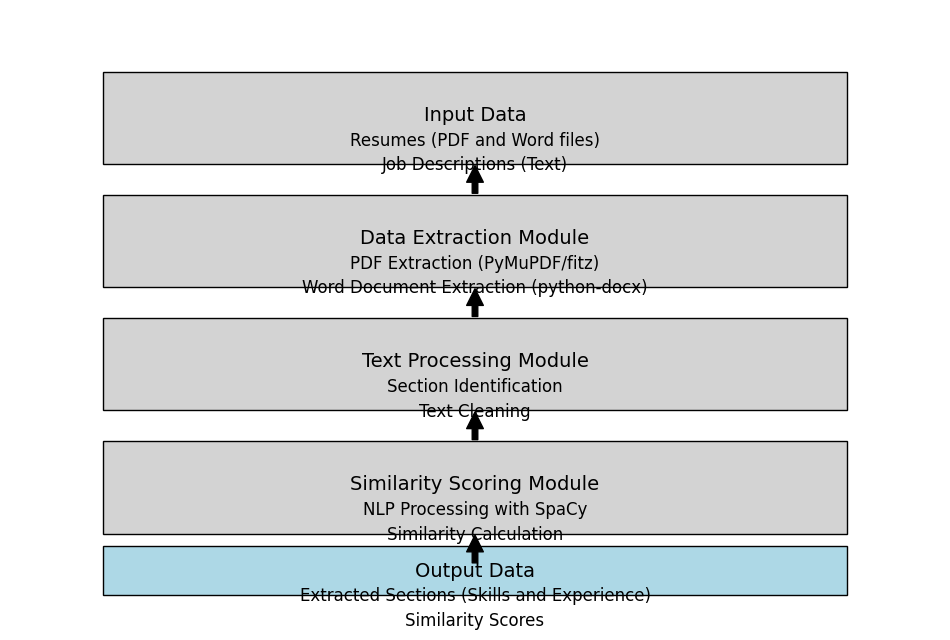

In [35]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Add rectangles (modules)
ax.add_patch(patches.Rectangle((0.1, 0.75), 0.8, 0.15, edgecolor='black', facecolor='lightgray'))
ax.add_patch(patches.Rectangle((0.1, 0.55), 0.8, 0.15, edgecolor='black', facecolor='lightgray'))
ax.add_patch(patches.Rectangle((0.1, 0.35), 0.8, 0.15, edgecolor='black', facecolor='lightgray'))
ax.add_patch(patches.Rectangle((0.1, 0.15), 0.8, 0.15, edgecolor='black', facecolor='lightgray'))
ax.add_patch(patches.Rectangle((0.1, 0.05), 0.8, 0.08, edgecolor='black', facecolor='lightblue'))

# Add arrows
ax.annotate('', xy=(0.5, 0.75), xytext=(0.5, 0.7), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.5, 0.55), xytext=(0.5, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.5, 0.35), xytext=(0.5, 0.3), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.5, 0.15), xytext=(0.5, 0.1), arrowprops=dict(facecolor='black', shrink=0.05))

# Add text
ax.text(0.5, 0.82, 'Input Data', fontsize=14, ha='center')
ax.text(0.5, 0.78, 'Resumes (PDF and Word files)', fontsize=12, ha='center')
ax.text(0.5, 0.74, 'Job Descriptions (Text)', fontsize=12, ha='center')

ax.text(0.5, 0.62, 'Data Extraction Module', fontsize=14, ha='center')
ax.text(0.5, 0.58, 'PDF Extraction (PyMuPDF/fitz)', fontsize=12, ha='center')
ax.text(0.5, 0.54, 'Word Document Extraction (python-docx)', fontsize=12, ha='center')

ax.text(0.5, 0.42, 'Text Processing Module', fontsize=14, ha='center')
ax.text(0.5, 0.38, 'Section Identification', fontsize=12, ha='center')
ax.text(0.5, 0.34, 'Text Cleaning', fontsize=12, ha='center')

ax.text(0.5, 0.22, 'Similarity Scoring Module', fontsize=14, ha='center')
ax.text(0.5, 0.18, 'NLP Processing with SpaCy', fontsize=12, ha='center')
ax.text(0.5, 0.14, 'Similarity Calculation', fontsize=12, ha='center')

ax.text(0.5, 0.08, 'Output Data', fontsize=14, ha='center')
ax.text(0.5, 0.04, 'Extracted Sections (Skills and Experience)', fontsize=12, ha='center')
ax.text(0.5, 0.00, 'Similarity Scores', fontsize=12, ha='center')

# Remove axis
ax.axis('off')


# Display the diagram
plt.show()


In [39]:
import spacy
from collections import Counter

def extract_keywords(text):
    """
    Extract keywords from text using SpaCy.
    """
    doc = nlp(text)
    keywords = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return set(keywords)

def find_missing_keywords(job_description, resume_details):
    """
    Find keywords that are in the job description but missing from the resume.
    """
    job_keywords = extract_keywords(job_description)
    resume_keywords = extract_keywords(resume_details)
    
    missing_keywords = job_keywords - resume_keywords
    return missing_keywords

# Example job description and resume texts
missing_keywords = find_missing_keywords(job_description, resume_text)

print(f"Missing Keywords: {missing_keywords}")


Missing Keywords: {'framework', 'engineer', 'passion', 'flask', 'designing', 'responsible', 'highly', 'essential', 'environment', 'familiarity', 'strong', 'high', 'desirable', 'quality', 'deliver', 'candidate', 'understanding', 'plus', 'ideal', 'collaborative', 'excellent', 'solid', 'look', 'communication', 'django', 'join', 'postgresql', 'principle', 'like'}


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Keyword_Comparison_Flowchart.png'

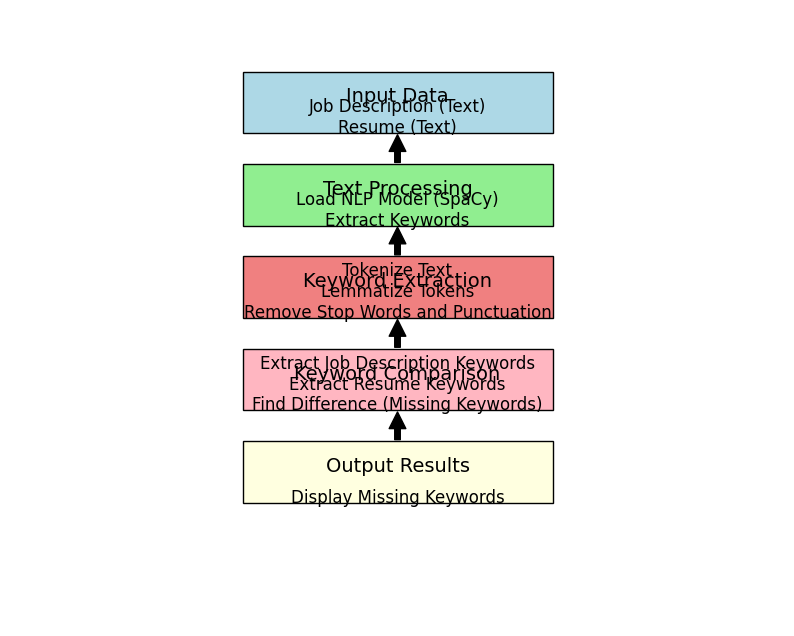

In [42]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Add rectangles (process steps)
ax.add_patch(patches.Rectangle((0.3, 0.8), 0.4, 0.1, edgecolor='black', facecolor='lightblue'))  # Input Data
ax.add_patch(patches.Rectangle((0.3, 0.65), 0.4, 0.1, edgecolor='black', facecolor='lightgreen'))  # Text Processing
ax.add_patch(patches.Rectangle((0.3, 0.5), 0.4, 0.1, edgecolor='black', facecolor='lightcoral'))  # Keyword Extraction
ax.add_patch(patches.Rectangle((0.3, 0.35), 0.4, 0.1, edgecolor='black', facecolor='lightpink'))  # Keyword Comparison
ax.add_patch(patches.Rectangle((0.3, 0.2), 0.4, 0.1, edgecolor='black', facecolor='lightyellow'))  # Output Results

# Add arrows
ax.annotate('', xy=(0.5, 0.8), xytext=(0.5, 0.75), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.5, 0.65), xytext=(0.5, 0.6), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.5, 0.5), xytext=(0.5, 0.45), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.5, 0.35), xytext=(0.5, 0.3), arrowprops=dict(facecolor='black', shrink=0.05))

# Add text
ax.text(0.5, 0.85, 'Input Data', fontsize=14, ha='center')
ax.text(0.5, 0.8, 'Job Description (Text)\nResume (Text)', fontsize=12, ha='center')

ax.text(0.5, 0.7, 'Text Processing', fontsize=14, ha='center')
ax.text(0.5, 0.65, 'Load NLP Model (SpaCy)\nExtract Keywords', fontsize=12, ha='center')

ax.text(0.5, 0.55, 'Keyword Extraction', fontsize=14, ha='center')
ax.text(0.5, 0.5, 'Tokenize Text\nLemmatize Tokens\nRemove Stop Words and Punctuation', fontsize=12, ha='center')

ax.text(0.5, 0.4, 'Keyword Comparison', fontsize=14, ha='center')
ax.text(0.5, 0.35, 'Extract Job Description Keywords\nExtract Resume Keywords\nFind Difference (Missing Keywords)', fontsize=12, ha='center')

ax.text(0.5, 0.25, 'Output Results', fontsize=14, ha='center')
ax.text(0.5, 0.2, 'Display Missing Keywords', fontsize=12, ha='center')

# Remove axis
ax.axis('off')

# Save the diagram
plt.savefig("/mnt/data/Keyword_Comparison_Flowchart.png")

# Display the diagram
plt.show()


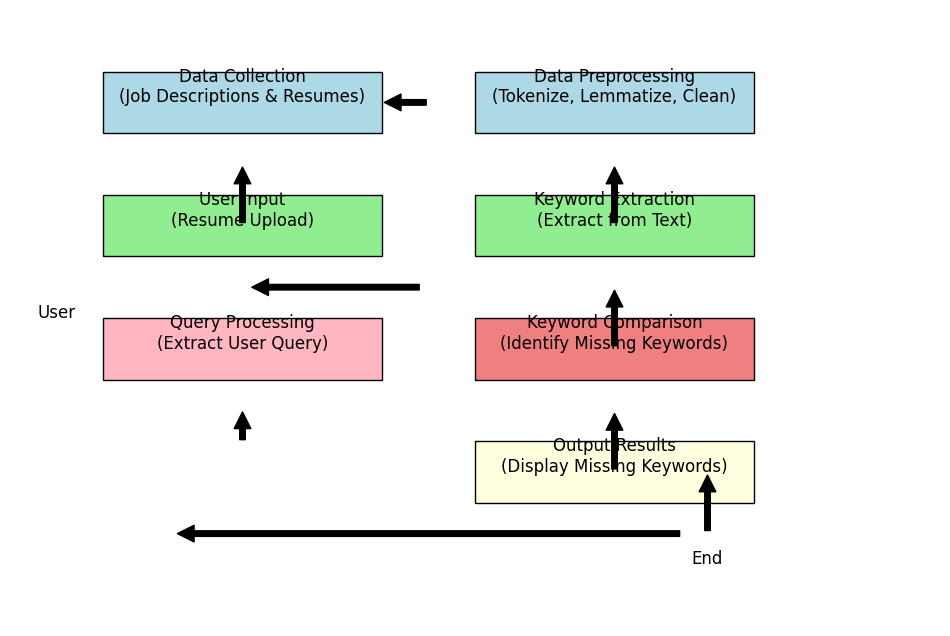

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_flowchart():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw the boxes
    ax.add_patch(patches.Rectangle((0.1, 0.8), 0.3, 0.1, edgecolor='black', facecolor='lightblue'))  # Data Collection
    ax.add_patch(patches.Rectangle((0.5, 0.8), 0.3, 0.1, edgecolor='black', facecolor='lightblue'))  # Data Preprocessing
    ax.add_patch(patches.Rectangle((0.5, 0.6), 0.3, 0.1, edgecolor='black', facecolor='lightgreen'))  # Keyword Extraction
    ax.add_patch(patches.Rectangle((0.5, 0.4), 0.3, 0.1, edgecolor='black', facecolor='lightcoral'))  # Keyword Comparison
    ax.add_patch(patches.Rectangle((0.5, 0.2), 0.3, 0.1, edgecolor='black', facecolor='lightyellow'))  # Output Results
    
    # Arrows
    ax.annotate('', xy=(0.4, 0.85), xytext=(0.45, 0.85), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('', xy=(0.65, 0.75), xytext=(0.65, 0.65), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('', xy=(0.65, 0.55), xytext=(0.65, 0.45), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('', xy=(0.65, 0.35), xytext=(0.65, 0.25), arrowprops=dict(facecolor='black', shrink=0.05))

    # Text in boxes
    ax.text(0.25, 0.85, 'Data Collection\n(Job Descriptions & Resumes)', fontsize=12, ha='center')
    ax.text(0.65, 0.85, 'Data Preprocessing\n(Tokenize, Lemmatize, Clean)', fontsize=12, ha='center')
    ax.text(0.65, 0.65, 'Keyword Extraction\n(Extract from Text)', fontsize=12, ha='center')
    ax.text(0.65, 0.45, 'Keyword Comparison\n(Identify Missing Keywords)', fontsize=12, ha='center')
    ax.text(0.65, 0.25, 'Output Results\n(Display Missing Keywords)', fontsize=12, ha='center')

    # User input and processing
    ax.add_patch(patches.Rectangle((0.1, 0.4), 0.3, 0.1, edgecolor='black', facecolor='lightpink'))  # User Input
    ax.add_patch(patches.Rectangle((0.1, 0.6), 0.3, 0.1, edgecolor='black', facecolor='lightgreen'))  # Query Processing
    ax.annotate('', xy=(0.25, 0.75), xytext=(0.25, 0.65), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('', xy=(0.25, 0.55), xytext=(0.45, 0.55), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('', xy=(0.25, 0.35), xytext=(0.25, 0.3), arrowprops=dict(facecolor='black', shrink=0.05))

    ax.text(0.25, 0.65, 'User Input\n(Resume Upload)', fontsize=12, ha='center')
    ax.text(0.25, 0.45, 'Query Processing\n(Extract User Query)', fontsize=12, ha='center')
    
    ax.text(0.05, 0.5, 'User', fontsize=12, ha='center')

    # Arrow back to User from Output
    ax.annotate('', xy=(0.75, 0.25), xytext=(0.75, 0.15), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('', xy=(0.15, 0.15), xytext=(0.75, 0.15), arrowprops=dict(facecolor='black', shrink=0.05))

    ax.text(0.75, 0.1, 'End', fontsize=12, ha='center')
    
    # Remove axes
    ax.axis('off')
    
    # Save and display
 #  plt.savefig("/mnt/data/Keyword_Comparison_Flowchart.png")
    plt.show()

create_flowchart()



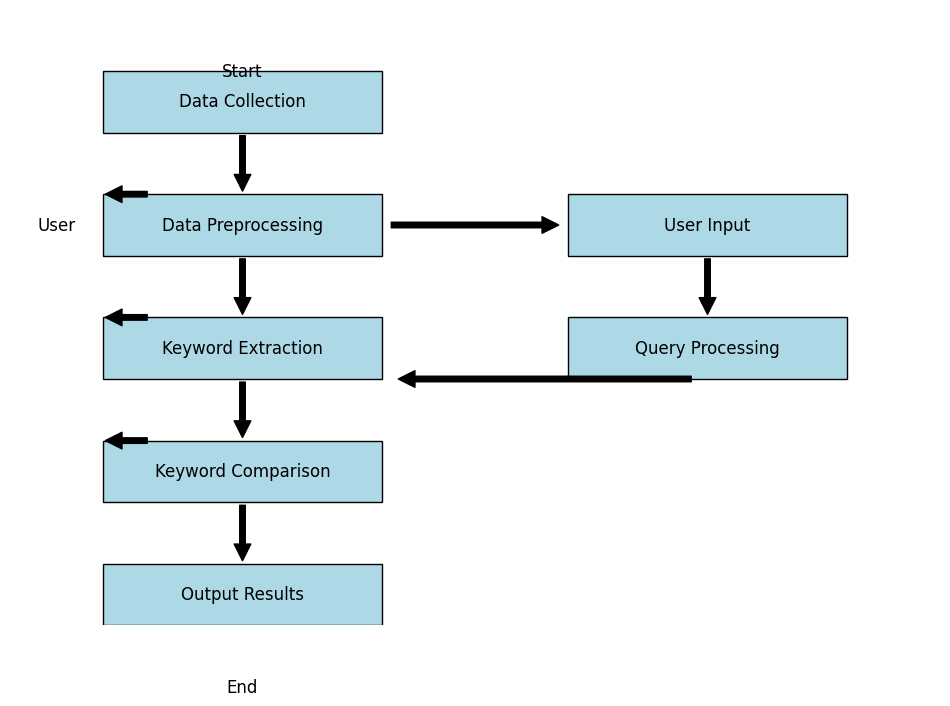

In [45]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_flowchart():
    fig, ax = plt.subplots(figsize=(12, 8))

    # Boxes coordinates and dimensions
    boxes = {
        "Data Collection": (0.1, 0.8, 0.3, 0.1),
        "Data Preprocessing": (0.1, 0.6, 0.3, 0.1),
        "Keyword Extraction": (0.1, 0.4, 0.3, 0.1),
        "Keyword Comparison": (0.1, 0.2, 0.3, 0.1),
        "Output Results": (0.1, 0.0, 0.3, 0.1),
        "User Input": (0.6, 0.6, 0.3, 0.1),
        "Query Processing": (0.6, 0.4, 0.3, 0.1),
    }

    # Draw the boxes
    for label, (x, y, width, height) in boxes.items():
        ax.add_patch(patches.Rectangle((x, y), width, height, edgecolor='black', facecolor='lightblue'))
        ax.text(x + width / 2, y + height / 2, label, fontsize=12, ha='center', va='center')

    # Arrows between boxes
    arrows = [
        ((0.25, 0.8), (0.25, 0.7)),
        ((0.25, 0.6), (0.25, 0.5)),
        ((0.25, 0.4), (0.25, 0.3)),
        ((0.25, 0.2), (0.25, 0.1)),
        ((0.4, 0.65), (0.6, 0.65)),
        ((0.75, 0.6), (0.75, 0.5)),
        ((0.75, 0.4), (0.4, 0.4)),
    ]

    for (start_x, start_y), (end_x, end_y) in arrows:
        ax.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=dict(facecolor='black', shrink=0.05))

    # Additional text for user and end
    ax.text(0.05, 0.65, 'User', fontsize=12, ha='center', va='center')
    ax.text(0.25, 0.9, 'Start', fontsize=12, ha='center', va='center')
    ax.text(0.25, -0.1, 'End', fontsize=12, ha='center', va='center')

    # User arrow
    ax.annotate('', xy=(0.1, 0.7), xytext=(0.15, 0.7), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('', xy=(0.1, 0.5), xytext=(0.15, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('', xy=(0.1, 0.3), xytext=(0.15, 0.3), arrowprops=dict(facecolor='black', shrink=0.05))

    # Remove axes
    ax.axis('off')

    # Save and display
    plt.savefig("Keyword_Comparison_Flowchart.png")
    plt.show()

create_flowchart()


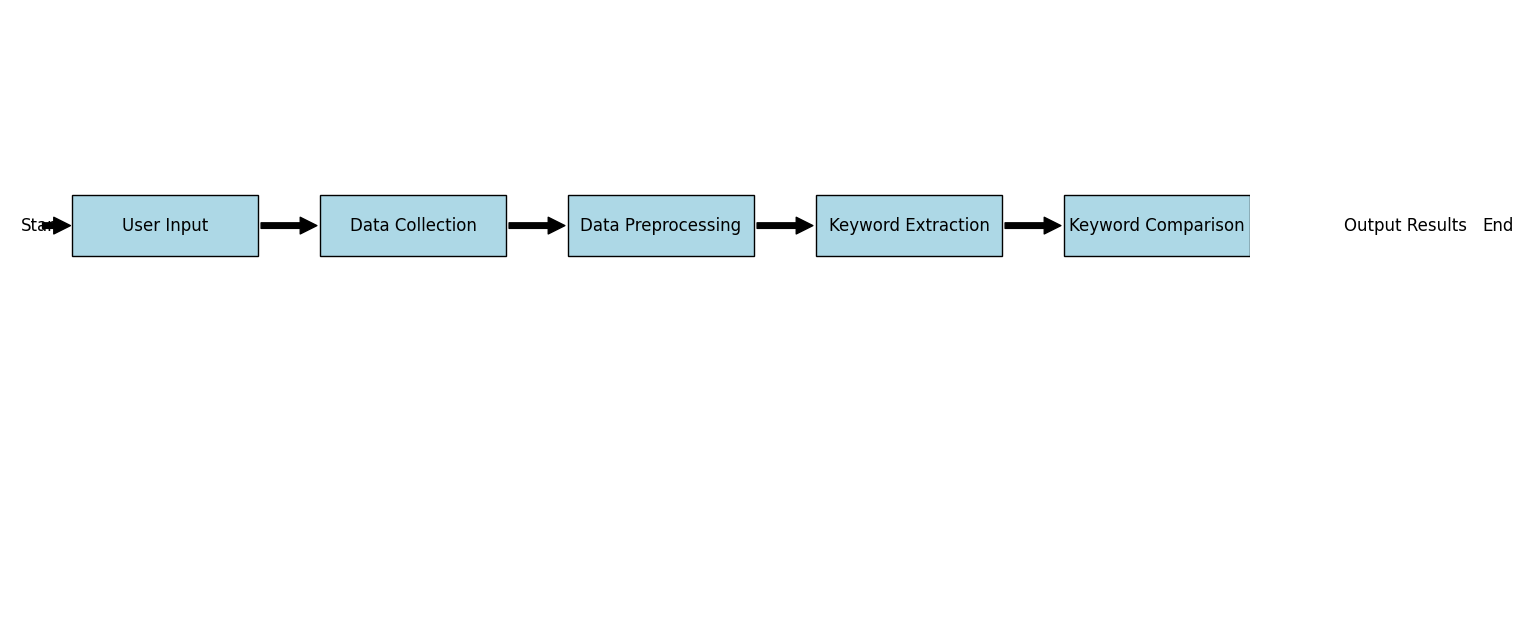

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_flowchart():
    fig, ax = plt.subplots(figsize=(16, 8))

    # Boxes coordinates and dimensions
    boxes = {
        "User Input": (0.05, 0.6, 0.15, 0.1),
        "Data Collection": (0.25, 0.6, 0.15, 0.1),
        "Data Preprocessing": (0.45, 0.6, 0.15, 0.1),
        "Keyword Extraction": (0.65, 0.6, 0.15, 0.1),
        "Keyword Comparison": (0.85, 0.6, 0.15, 0.1),
        "Output Results": (1.05, 0.6, 0.15, 0.1)
    }

    # Draw the boxes
    for label, (x, y, width, height) in boxes.items():
        ax.add_patch(patches.Rectangle((x, y), width, height, edgecolor='black', facecolor='lightblue'))
        ax.text(x + width / 2, y + height / 2, label, fontsize=12, ha='center', va='center')

    # Arrows between boxes
    arrows = [
        ((0.2, 0.65), (0.25, 0.65)),
        ((0.4, 0.65), (0.45, 0.65)),
        ((0.6, 0.65), (0.65, 0.65)),
        ((0.8, 0.65), (0.85, 0.65)),
        ((1.0, 0.65), (1.05, 0.65)),
    ]

    for (start_x, start_y), (end_x, end_y) in arrows:
        ax.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=dict(facecolor='black', shrink=0.05))

    # Additional text for start and end
    ax.text(0.025, 0.65, 'Start', fontsize=12, ha='center', va='center')
    ax.text(1.2, 0.65, 'End', fontsize=12, ha='center', va='center')

    # User arrow
    ax.annotate('', xy=(0.05, 0.65), xytext=(0.025, 0.65), arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate('', xy=(1.125, 0.65), xytext=(1.2, 0.65), arrowprops=dict(facecolor='black', shrink=0.05))

    # Remove axes
    ax.axis('off')

    # Save and display
    plt.show()

create_flowchart()


In [51]:
import spacy
import numpy as np
from scipy.spatial.distance import cosine
import fitz  # PyMuPDF for PDF handling
import os
import docx  # python-docx for Word document handling


def extract_text_from_pdf(pdf_path):
    try:
        document = fitz.open(pdf_path)
        text = ''
        for page_num in range(document.page_count):
            page = document.load_page(page_num)
            text += page.get_text()
        return text
    except Exception as e:
        print(f"An error occurred while processing {pdf_path}: {e}")
        return None

def extract_text_from_docx(docx_path):
    try:
        doc = docx.Document(docx_path)
        full_text = []
        for para in doc.paragraphs:
            full_text.append(para.text)
        return '\n'.join(full_text)
    except Exception as e:
        print(f"An error occurred while processing {docx_path}: {e}")
        return None

def extract_keywords(text):
    doc = nlp(text.lower())
    keywords = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(keywords)

def vectorize_text(text):
    doc = nlp(text)
    return doc.vector

def calculate_similarity(job_description, resume_text):
    job_keywords = extract_keywords(job_description)
    resume_keywords = extract_keywords(resume_text)
    
    job_vec = vectorize_text(job_keywords)
    resume_vec = vectorize_text(resume_keywords)
    
    similarity_score = 1 - cosine(job_vec, resume_vec)
    return similarity_score

def process_multiple_resumes(folder_path, job_description):
    resume_details_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_name.endswith('.pdf'):
            resume_text = extract_text_from_pdf(file_path)
        elif file_name.endswith('.docx'):
            resume_text = extract_text_from_docx(file_path)
        else:
            continue
        
        if resume_text:
            resume_details = {}
            resume_details['file_name'] = file_name
            resume_details['similarity_score'] = calculate_similarity(job_description, resume_text)
            resume_details_list.append(resume_details)
        else:
            print(f"Failed to extract text from {file_name}.")
    
    return resume_details_list

# Example job description
job_description = "Looking for a software engineer with experience in Python, machine learning, and data analysis."

# Example usage
resumes_folder_path = '/Users/juyinshafaqinamdar/Downloads/archive/data/data/ACCOUNTANT'
resume_details_list = process_multiple_resumes(resumes_folder_path, job_description)

# Sort resumes by similarity score in descending order
ranked_resumes = sorted(resume_details_list, key=lambda x: x['similarity_score'], reverse=True)

# Output the ranked resumes
print("Ranked Resumes:")
for resume_details in ranked_resumes:
    print(f"File: {resume_details['file_name']}")
    print(f"Similarity Score: {resume_details['similarity_score']:.4f}")
    print()


Ranked Resumes:
File: 17407184.pdf
Similarity Score: 0.9195

File: 19545827.pdf
Similarity Score: 0.9132

File: 28614791.pdf
Similarity Score: 0.9121

File: 27558837.pdf
Similarity Score: 0.9120

File: 18569929.pdf
Similarity Score: 0.9111

File: 22465498.pdf
Similarity Score: 0.9105

File: 20624984.pdf
Similarity Score: 0.9103

File: 14055988.pdf
Similarity Score: 0.9097

File: 23246831.pdf
Similarity Score: 0.9093

File: 62809577.pdf
Similarity Score: 0.9090

File: 13072019.pdf
Similarity Score: 0.9088

File: 63137898.pdf
Similarity Score: 0.9086

File: 33527446.pdf
Similarity Score: 0.9086

File: 21338490.pdf
Similarity Score: 0.9082

File: 31602598.pdf
Similarity Score: 0.9080

File: 50222417.pdf
Similarity Score: 0.9079

File: 12338274.pdf
Similarity Score: 0.9076

File: 23734441.pdf
Similarity Score: 0.9074

File: 30813919.pdf
Similarity Score: 0.9073

File: 78403342.pdf
Similarity Score: 0.9073

File: 18669563.pdf
Similarity Score: 0.9073

File: 27573855.pdf
Similarity Score: 0.

In [54]:
# Install Necessary Libraries
#!pip install transformers
#!pip install torch
#!pip install PyMuPDF

# Import Modules
import fitz
import re
import os
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Define PDF Text Extraction Function
def extract_text_from_pdf(pdf_path):
    document = fitz.open(pdf_path)
    text = ""
    for page_num in range(document.page_count):
        page = document.load_page(page_num)
        text += page.get_text()
    return text

# Preprocess Text for BERT
def preprocess_text(text):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokens = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=512)
    return tokens

# Load Pre-trained BERT Model
def load_model():
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Example for binary classification
    return model

# Predict Function
def predict(text, model):
    tokens = preprocess_text(text)
    with torch.no_grad():
        outputs = model(**tokens)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1).item()
    return predictions

# Example Usage
pdf_path = 'archive/data/data/ACCOUNTANT/98559931.pdf'
extracted_text = extract_text_from_pdf(pdf_path)
model = load_model()
prediction = predict(extracted_text, model)
print(f'Prediction: {prediction}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Prediction: 0
